<a href="https://colab.research.google.com/github/Yusra-Zafar/Machine-Learning-Regression/blob/main/ML_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Preprocessing

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df=sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
df.shape

(244, 7)

**Label encoding categores**

In [ ]:
# prompt: use label encoding to convert sex, smoker, day, time into 1 and 0

# Label encoding for sex
df['sex'] = df['sex'].apply(lambda x: 1 if x == 'Male' else 0)

# Label encoding for smoker
df['smoker'] = df['smoker'].apply(lambda x: 1 if x == 'Yes' else 0)

# Label encoding for day
day_mapping = {'Thur': 1, 'Fri': 2, 'Sat': 3, 'Sun': 4}
df['day'] = df['day'].map(day_mapping)

# Label encoding for time
time_mapping = {'Lunch': 1, 'Dinner': 2}
df['time'] = df['time'].map(time_mapping)
df.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,4,2,2
1,10.34,1.66,1,0,4,2,3
2,21.01,3.50,1,0,4,2,3
3,23.68,3.31,1,0,4,2,2
4,24.59,3.61,0,0,4,2,4


<Axes: >

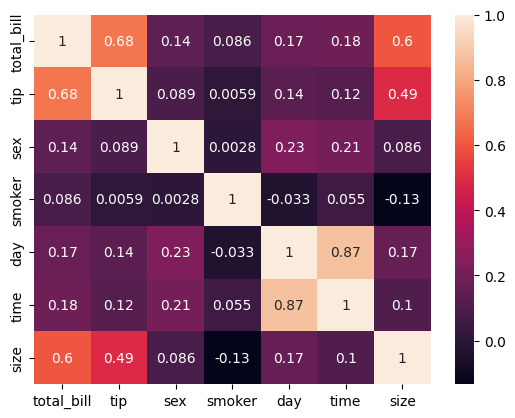

In [ ]:
corr = df.corr()
sns.heatmap(corr, annot=True)

**Dropping less related feature 'smoker'**

In [ ]:
df.drop(columns = 'smoker', index=1, inplace=True)
df.head()

,total_bill,tip,sex,day,time,size
0,16.99,1.01,0,4,2,2
2,21.01,3.50,1,4,2,3
3,23.68,3.31,1,4,2,2
4,24.59,3.61,0,4,2,4
5,25.29,4.71,1,4,2,4


**Handling outliers**

<Axes: >

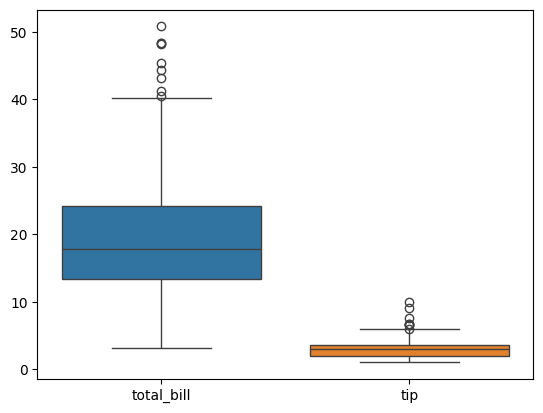

In [ ]:
sns.boxplot(data=df[['total_bill', 'tip']])

<Axes: ylabel='Density'>

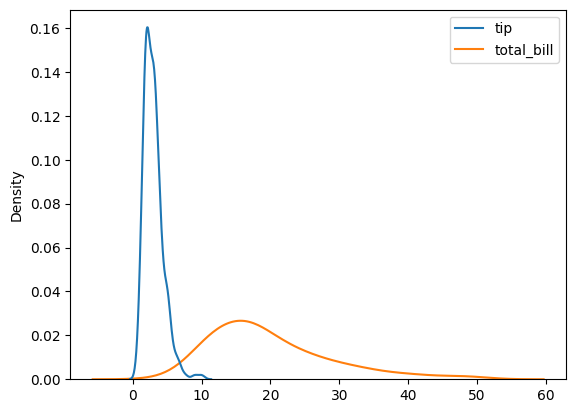

In [ ]:
sns.kdeplot(data=df[['tip', 'total_bill']])

In [ ]:
# # prompt: remove outliers from 'total_bill' and 'tip'

# def remove_outliers(df, columns):
#   for column in columns:
#     Q1 = df[column].quantile(0.25)
#     Q3 = df[column].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
#   return df

# df = remove_outliers(df, ['total_bill', 'tip'])


<Axes: >

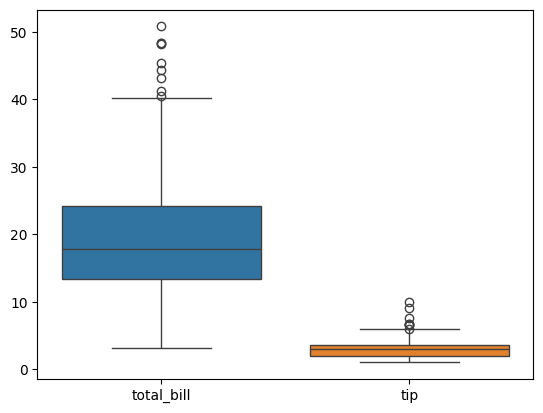

In [ ]:
sns.boxplot(data=df[['total_bill', 'tip']])

In [ ]:
df.shape

(243, 6)

**Separating X and y**

In [ ]:
X = df.drop(columns='tip', axis=1)
y = df['tip']

### Standard scaling

In [ ]:
# prompt: scale X using standard scaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)    # returns an array

# X_scaled = pd.DataFrame(X_scaled, columns = X.columns)
# X_scaled.head()

### train_test_split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1)

In [ ]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}\n")

print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (194, 5)
X_test shape: (49, 5)

y_train shape: (194,)
y_test shape: (49,)


In [ ]:
X_scaled

array([[-0.31917551, -1.33906813,  1.11013388,  0.62335498, -0.59735222],
       [ 0.13344155,  0.74678799,  1.11013388,  0.62335498,  0.45450713],
       [ 0.43406035,  0.74678799,  1.11013388,  0.62335498, -0.59735222],
       ...,
       [ 0.32034312,  0.74678799,  0.24273024,  0.62335498, -0.59735222],
       [-0.22572472,  0.74678799,  0.24273024,  0.62335498, -0.59735222],
       [-0.11763707, -1.33906813, -1.49207705,  0.62335498, -0.59735222]])

## Linear Regression

**Training**

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X = X_train, y = y_train)

LinearRegression()

**Testing**

In [ ]:
lin_reg_pred = lin_reg.predict(X_test)

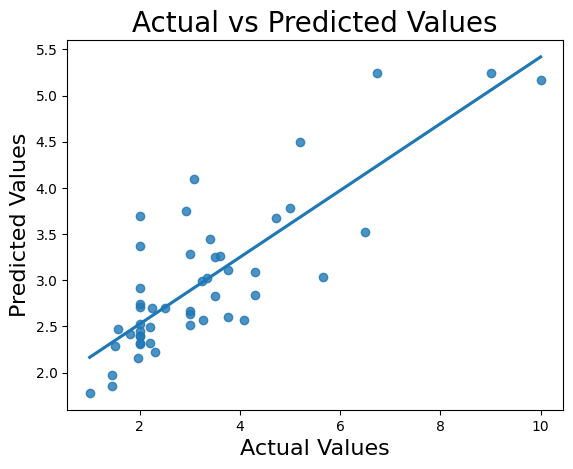

In [ ]:
# prompt: visualize the actual and predicted values through a scatter plot and fit a regression line

# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Add a regression line
sns.regplot(x=y_test, y=lin_reg_pred, ci=None)

# Add labels and title
plt.xlabel('Actual Values', fontsize=16)
plt.ylabel('Predicted Values', fontsize=16)
plt.title('Actual vs Predicted Values', fontsize=20)

# Show the plot
plt.show()


## Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtree_reg = DecisionTreeRegressor()
dtree_reg.fit(X = X_train, y = y_train)

DecisionTreeRegressor()

In [ ]:
dtree_reg_pred = dtree_reg.predict(X_test)

<Axes: xlabel='tip'>

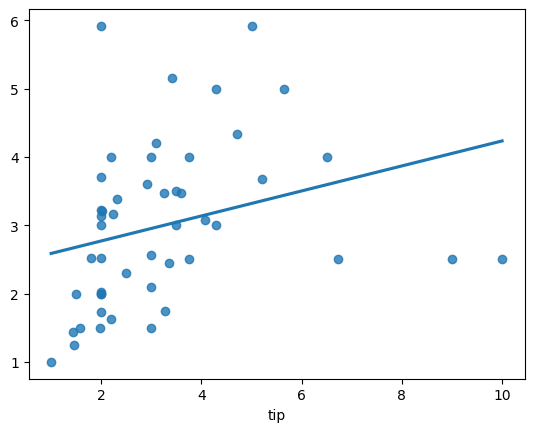

In [ ]:
sns.regplot(x=y_test, y=dtree_reg_pred, ci=None)

## Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X = X_train, y = y_train)

RandomForestRegressor()

In [ ]:
rf_reg_pred = rf_reg.predict(X_test)

<Axes: xlabel='tip'>

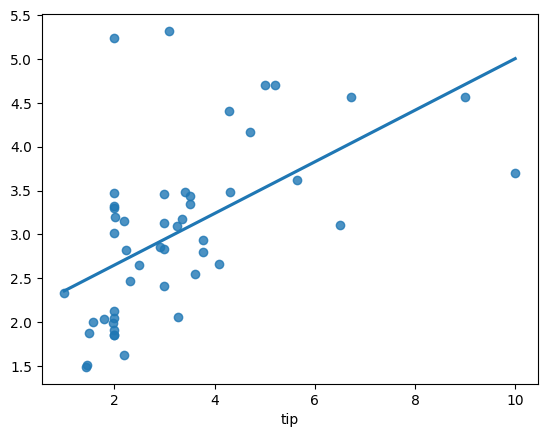

In [ ]:
sns.regplot(x=y_test, y=rf_reg_pred, ci=None)

## Gradient Boosting Regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gb_reg = GradientBoostingRegressor()
gb_reg.fit(X = X_train, y = y_train)

GradientBoostingRegressor()

In [ ]:
gb_reg_pred = gb_reg.predict(X_test)

<Axes: xlabel='tip'>

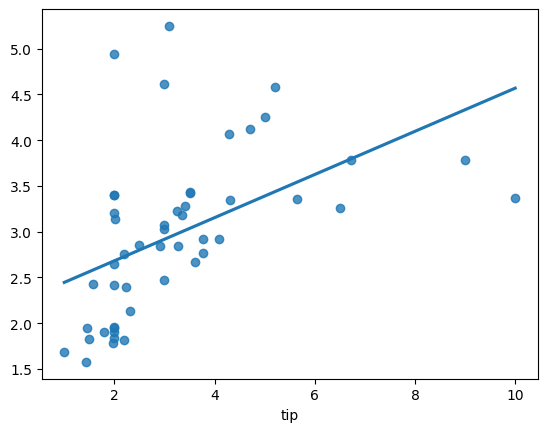

In [ ]:
sns.regplot(x=y_test, y=gb_reg_pred, ci=None)

### Evaluation

#### Residual Analysis

In [ ]:
# prompt: calculate residual of linear regression

residual = y_test - lin_reg_pred  # actual - predicted
print(residual)

68    -0.728836
243    0.364760
206   -0.034866
123   -0.522201
90    -0.288564
218   -0.411325
59     1.490500
186    0.246065
177   -0.401571
5      1.032090
220   -0.124208
226   -0.319190
117   -0.787665
108    1.162569
170    4.834116
241   -0.912217
181    2.619568
52     0.703550
28     1.456709
240   -1.374758
219   -1.003294
35     0.334911
94     0.261344
183    2.972733
119   -0.830176
118   -0.614148
107    1.197297
74    -0.290089
39     1.222584
210   -1.691436
202   -0.454651
45     0.327699
63     0.650811
203   -0.196247
86    -0.314712
212    3.756237
40    -0.455206
32     0.486462
19     0.327217
133   -0.402068
120    0.090505
20     1.505308
92    -0.780674
70    -0.185452
34     0.705256
91     0.671890
36    -0.714392
12    -0.898365
30    -0.529939
Name: tip, dtype: float64


<Axes: xlabel='tip', ylabel='Count'>

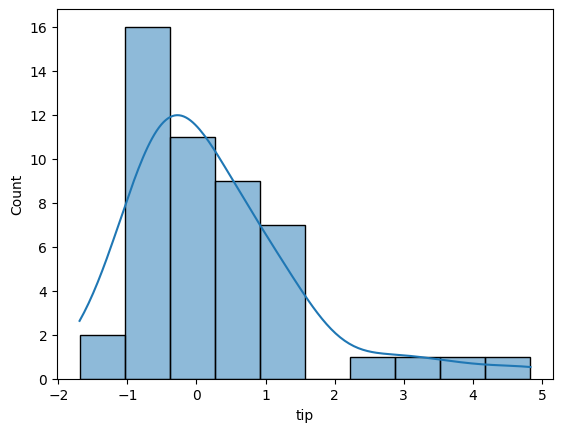

In [ ]:
sns.histplot(data=residual, kde=True)

In [ ]:
import numpy as np
# Combine actual and predicted values side by side
results = np.column_stack((y_test, lin_reg_pred))

# Printing the results
print("Actual Values  |  Predicted Values")
print("-----------------------------")
for actual, predicted in results:
    print(f"{actual:14.2f} |  {predicted:12.2f}")

Actual Values  |  Predicted Values
-----------------------------
          2.01 |          2.74
          3.00 |          2.64
          3.41 |          3.44
          2.00 |          2.52
          3.00 |          3.29
          1.44 |          1.85
          6.73 |          5.24
          3.50 |          3.25
          2.00 |          2.40
          4.71 |          3.68
          2.20 |          2.32
          2.00 |          2.32
          1.50 |          2.29
          3.76 |          2.60
         10.00 |          5.17
          2.00 |          2.91
          5.65 |          3.03
          5.20 |          4.50
          4.30 |          2.84
          2.00 |          3.37
          3.09 |          4.09
          3.60 |          3.27
          3.25 |          2.99
          6.50 |          3.53
          2.92 |          3.75
          1.80 |          2.41
          4.29 |          3.09
          2.20 |          2.49
          5.00 |          3.78
          2.00 |          3.69
     

In [ ]:
# count the total positive and negative residues
positive_residues = np.count_nonzero(residual >= 0)
negative_residues = np.count_nonzero(residual < 0)

print(f"Positive Residues: {positive_residues}")
print(f"Negative Residues: {negative_residues}")

Positive Residues: 23
Negative Residues: 26


#### Other metrics

**Linear Regression**

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

lin_reg_mae = mean_absolute_error(y_test, lin_reg_pred)
lin_reg_mse = mean_squared_error(y_test, lin_reg_pred)
lin_reg_r2 = r2_score(y_test, lin_reg_pred)
lin_reg_rmse = np.sqrt(lin_reg_mse)
lin_reg_adj_r2 = 1 - (1 - lin_reg_r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

print(f"MAE: {lin_reg_mae}")
print(f"MSE: {lin_reg_mse}")
print(f"R2: {lin_reg_r2}")
print(f"RMSE: {lin_reg_rmse}")
print(f"Adjusted R2: {lin_reg_adj_r2}")

MAE: 0.8915598311748866
MSE: 1.6425407298043713
R2: 0.5066936236502079
RMSE: 1.2816164519092175
Adjusted R2: 0.4493324170979065


**Decision Tree**

In [ ]:
dtree_reg_mae = mean_absolute_error(y_test, dtree_reg_pred)
dtree_reg_mse = mean_squared_error(y_test, dtree_reg_pred)
dtree_reg_r2 = r2_score(y_test, dtree_reg_pred)
dtree_reg_rmse = np.sqrt(dtree_reg_mse)
dtree_reg_adj_r2 = 1 - (1 - dtree_reg_r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

print(f"MAE: {dtree_reg_mae}")
print(f"MSE: {dtree_reg_mse}")
print(f"R2: {dtree_reg_r2}")
print(f"RMSE: {dtree_reg_rmse}")
print(f"Adjusted R2: {dtree_reg_adj_r2}")

MAE: 1.1616326530612244
MSE: 3.5554612244897954
R2: -0.0678162562910396
RMSE: 1.8855930696971166
Adjusted R2: -0.191980937255114


**Random Forest**

In [ ]:
rf_reg_mae = mean_absolute_error(y_test, rf_reg_pred)
rf_reg_mse = mean_squared_error(y_test, rf_reg_pred)
rf_reg_r2 = r2_score(y_test, rf_reg_pred)
rf_reg_rmse = np.sqrt(rf_reg_mse)
rf_reg_adj_r2 = 1 - (1 - rf_reg_r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

print(f"MAE: {rf_reg_mae}")
print(f"MSE: {rf_reg_mse}")
print(f"R2: {rf_reg_r2}")
print(f"RMSE: {rf_reg_rmse}")
print(f"Adjusted R2: {rf_reg_adj_r2}")

MAE: 0.9252857142857139
MSE: 2.3513030922448976
R2: 0.29383010899611683
RMSE: 1.533395934599051
Adjusted R2: 0.21171733097240952


**Gradient Boosting**

In [ ]:
gb_reg_mae = mean_absolute_error(y_test, gb_reg_pred)
gb_reg_mse = mean_squared_error(y_test, gb_reg_pred)
gb_reg_r2 = r2_score(y_test, gb_reg_pred)
gb_reg_rmse = np.sqrt(gb_reg_mse)
gb_reg_adj_r2 = 1 - (1 - gb_reg_r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

print(f"MAE: {gb_reg_mae}")
print(f"MSE: {gb_reg_mse}")
print(f"R2: {gb_reg_r2}")
print(f"RMSE: {gb_reg_rmse}")
print(f"Adjusted R2: {gb_reg_adj_r2}")

MAE: 0.9517486480342223
MSE: 2.6076679170490715
R2: 0.2168357304379921
RMSE: 1.6148275192877632
Adjusted R2: 0.12577011769822377


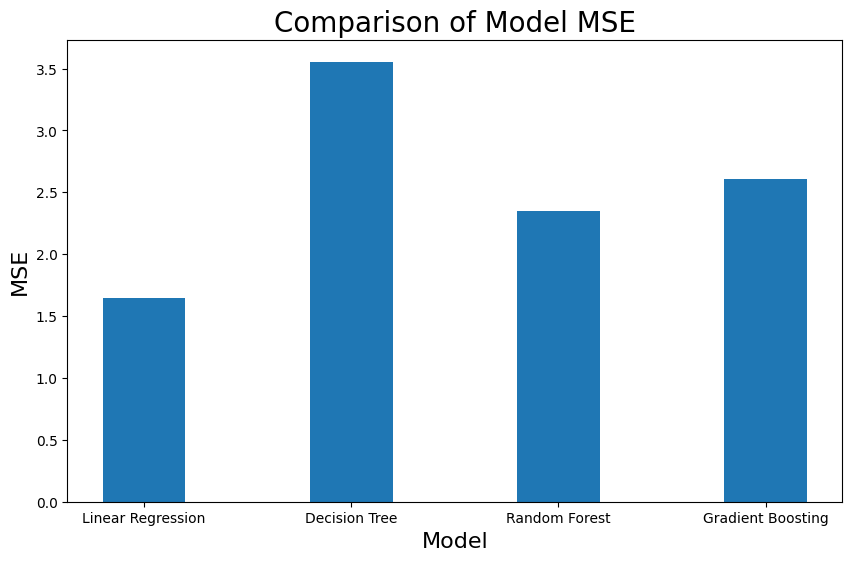

In [ ]:
# prompt: plot the mse in a graph

import matplotlib.pyplot as plt

# Create a list of model names
model_names = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting']

# Create a list of corresponding MSE values
mse_values = [lin_reg_mse, dtree_reg_mse, rf_reg_mse, gb_reg_mse]

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(model_names, mse_values, width=0.4)

# Add labels and title
plt.xlabel('Model', fontsize=16)
plt.ylabel('MSE', fontsize=16)
plt.title('Comparison of Model MSE', fontsize=20)

# Show the plot
plt.show()


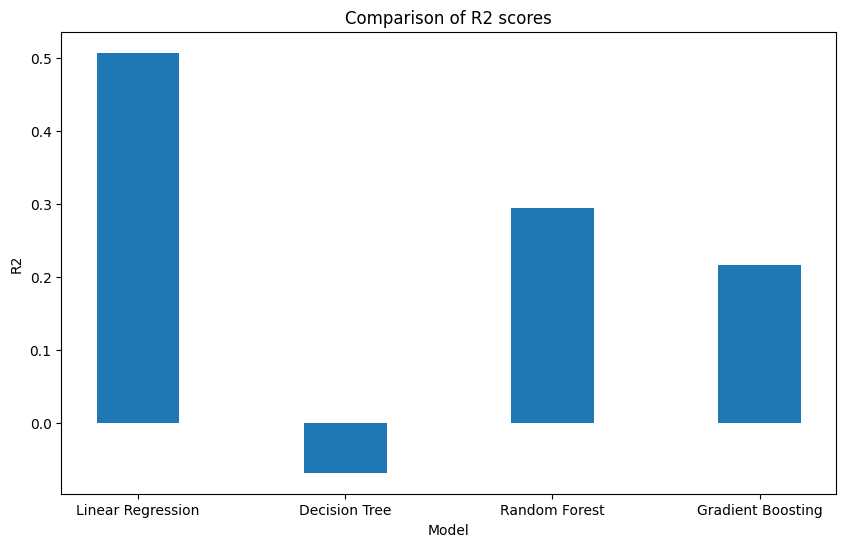

In [ ]:
r2_values = [lin_reg_r2, dtree_reg_r2, rf_reg_r2, gb_reg_r2]
plt.figure(figsize=(10, 6))

plt.bar(model_names, r2_values, width=0.4)
plt.xlabel('Model')
plt.ylabel('R2')
plt.title('Comparison of R2 scores')
plt.show()

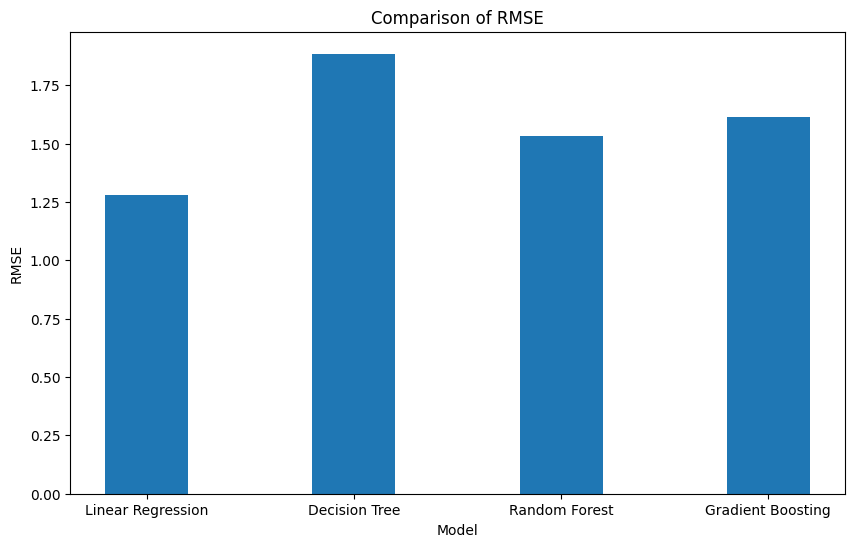

In [ ]:
rmse_values = [lin_reg_rmse, dtree_reg_rmse, rf_reg_rmse, gb_reg_rmse]
plt.figure(figsize=(10, 6))

plt.bar(model_names, rmse_values, width=0.4)
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('Comparison of RMSE')
plt.show()

## Training without scaling


In [ ]:
X.head()

,total_bill,sex,day,time,size
0,16.99,0,4,2,2
2,21.01,1,4,2,3
3,23.68,1,4,2,2
4,24.59,0,4,2,4
5,25.29,1,4,2,4


### Training

In [ ]:
# prompt: train all the models using X efficiently

models = {
  "Linear Regression": LinearRegression(),
  "Decision Tree": DecisionTreeRegressor(),
  "Random Forest": RandomForestRegressor(),
  "Gradient Boosting": GradientBoostingRegressor()
}

trained_models = {}

for name, model in models.items():
  model.fit(X_train, y_train)
  trained_models[name] = model

print("All models trained successfully!")


All models trained successfully!


In [ ]:
trained_models

{'Linear Regression': LinearRegression(),
 'Decision Tree': DecisionTreeRegressor(),
 'Random Forest': RandomForestRegressor(),
 'Gradient Boosting': GradientBoostingRegressor()}

### Testing

In [ ]:
# prompt: store all the predictions of models using a naming convention in a dictionary using loop

model_predictions = {}

for name, model in trained_models.items():
  model_predictions[name] = model.predict(X_test)

print("Predictions stored in dictionary:")
print(model_predictions)


Predictions stored in dictionary:
{'Linear Regression': array([2.73883588, 2.6352395 , 3.44486558, 2.52220055, 3.28856379,
       1.85132462, 5.23949996, 3.25393476, 2.40157064, 3.67790974,
       2.32420849, 2.31918991, 2.28766545, 2.59743096, 5.16588421,
       2.91221678, 3.03043169, 4.49645045, 2.84329077, 3.37475818,
       4.09329397, 3.26508948, 2.98865556, 3.52726732, 3.75017585,
       2.41414824, 3.09270346, 2.49008923, 3.77741584, 3.69143596,
       2.45465115, 2.67230065, 3.10918872, 2.69624749, 2.31471193,
       5.24376343, 2.69520635, 2.51353828, 3.02278257, 2.40206842,
       2.21949455, 2.57469248, 1.78067386, 2.15545178, 2.5647444 ,
       2.82810959, 2.71439195, 2.46836492, 1.97993914]), 'Decision Tree': array([3.21, 4.  , 5.16, 2.03, 2.56, 1.44, 2.5 , 3.5 , 4.  , 4.34, 1.63,
       1.73, 2.  , 3.5 , 2.5 , 3.48, 5.  , 3.68, 3.  , 3.14, 4.67, 3.48,
       3.  , 4.  , 3.61, 2.52, 5.  , 3.23, 5.92, 5.92, 2.  , 4.  , 2.5 ,
       2.3 , 2.  , 2.5 , 3.16, 2.09, 4.08, 2.52,

### Evaluating

In [ ]:
# prompt: create a function to calculate mse, rmse, mae, r2_score and adjusted r2 for all the models efficiently and store in separate dictionaries

import numpy as np

def evaluate_models(y_true, y_pred):
  mse = mean_squared_error(y_true, y_pred)
  rmse = np.sqrt(mse)
  mae = mean_absolute_error(y_true, y_pred)
  r2 = r2_score(y_true, y_pred)
  adj_r2 = 1 - (1 - r2) * (len(y_true) - 1) / (len(y_true) - X_test.shape[1] - 1)

  return {
    "mse": mse,
    "rmse": rmse,
    "mae": mae,
    "r2": r2,
    "adj_r2": adj_r2
  }

model_metrics = {}

for name, model in trained_models.items():
  model_metrics[name] = evaluate_models(y_test, model_predictions[name])

print("Evaluation metrics for each model:")
print(model_metrics)



Evaluation metrics for each model:
dict_items([('Linear Regression', {'mse': 1.6425407298043713, 'rmse': 1.2816164519092175, 'mae': 0.8915598311748866, 'r2': 0.5066936236502079, 'adj_r2': 0.4493324170979065}), ('Decision Tree', {'mse': 3.595771428571428, 'rmse': 1.896251942272289, 'mae': 1.1783673469387757, 'r2': -0.07992267188525082, 'adj_r2': -0.2054950755928382}), ('Random Forest', {'mse': 2.281585802857142, 'rmse': 1.510491907577509, 'mae': 0.9092612244897956, 'r2': 0.31476839245706933, 'adj_r2': 0.23509029855672847}), ('Gradient Boosting', {'mse': 2.5477051340524692, 'rmse': 1.5961532301293848, 'mae': 0.9479024009557341, 'r2': 0.23484443041064118, 'adj_r2': 0.14587285255141336})])


### Comparing by visualizing

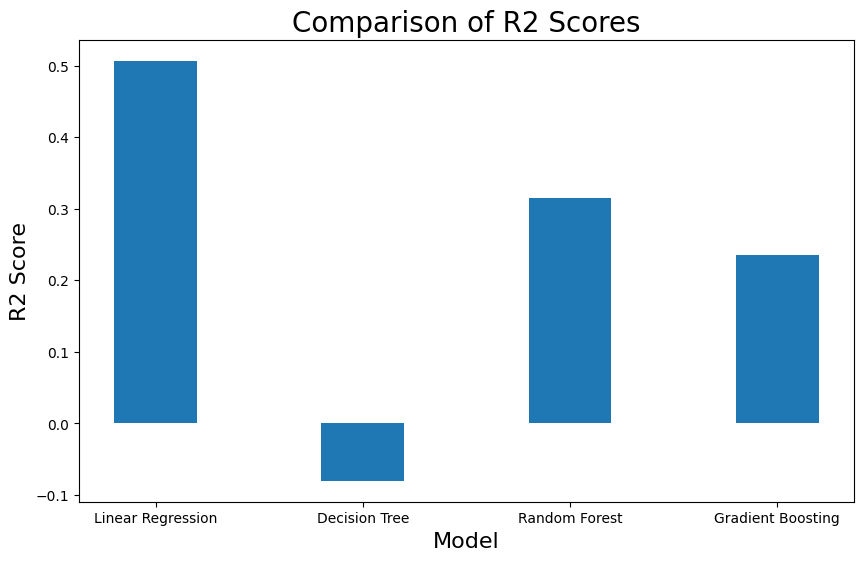

In [ ]:
# prompt: create bar charts comparing r2 score of all models

import matplotlib.pyplot as plt
# Extract R2 scores from model_metrics
r2_scores = [metrics["r2"] for name, metrics in model_metrics.items()]

# Define model names
model_names = list(model_metrics.keys())

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(model_names, r2_scores, width=0.4)

# Add labels and title
plt.xlabel('Model', fontsize=16)
plt.ylabel('R2 Score', fontsize=16)
plt.title('Comparison of R2 Scores', fontsize=20)

# Show the plot
plt.show()


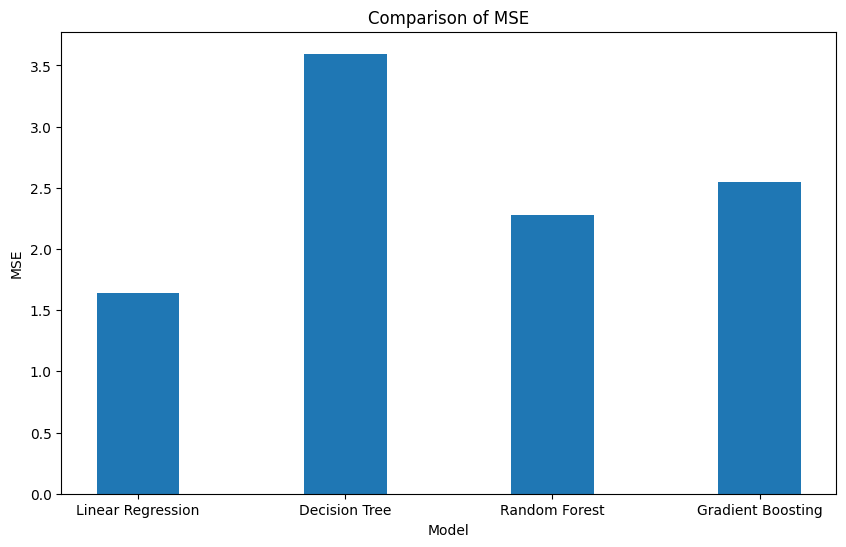

In [ ]:
mse_values = [metrics["mse"] for name, metrics in model_metrics.items()]
plt.figure(figsize=(10, 6))

plt.bar(model_names, mse_values, width=0.4)
plt.xlabel('Model')
plt.ylabel('MSE')
plt.title('Comparison of MSE')
plt.show()

- Hence concluded that feature scaling is not affecting models' results.